# Importing the libraries

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Loading the preprocessed data

In [21]:
preprocessed_heart_df = pd.read_csv('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/data/heart_disease/preprocessed_heart_data.csv')

# Separate the features and the target variable

In [22]:

X = preprocessed_heart_df.drop('target', axis=1)
y = preprocessed_heart_df['target']


# Split the dataset into training and testing sets

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression Model

In [24]:
# Initialize the logistic regression model with increased max_iter and a different solver
log_reg = LogisticRegression(max_iter=7000, solver='saga')

# Fit the model to the data
log_reg.fit(X_train, y_train)

# Predict the target variable using the training set
y_train_pred = log_reg.predict(X_train)

# Predict the target variable using the testing set
y_pred = log_reg.predict(X_test)

# Calculate and print the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.8553719008264463
Testing Accuracy: 0.8852459016393442


# Plot the confusion matrix

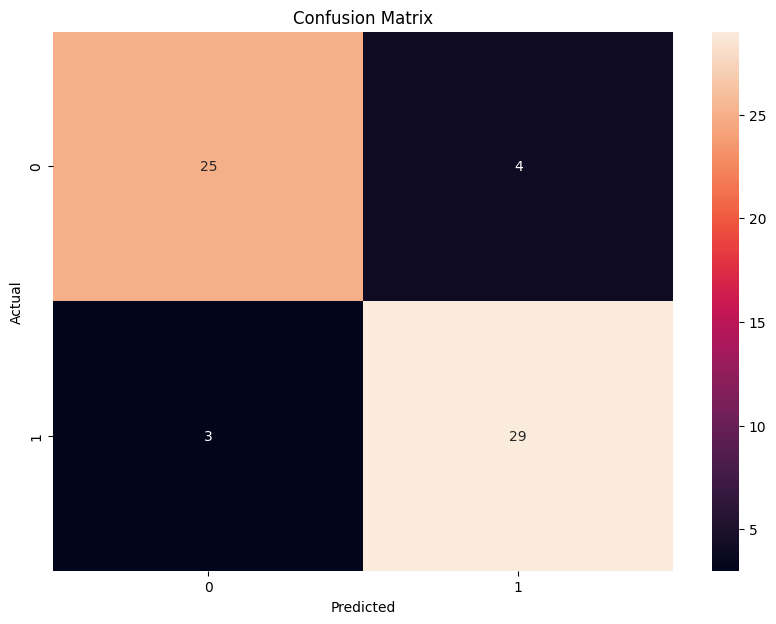

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Plot the ROC curve

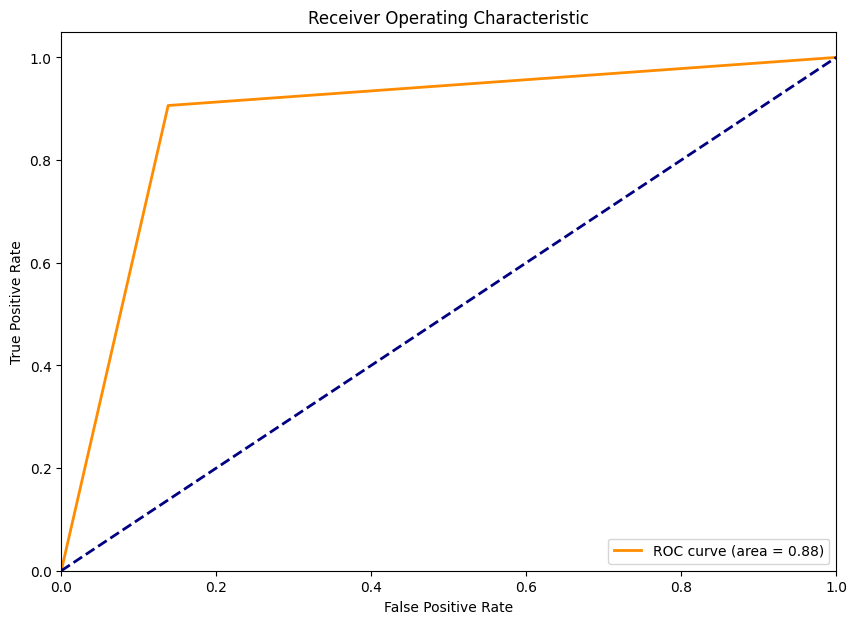

In [26]:
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification Report 

In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Save the model

In [28]:
import pickle

# Specify the path where you want to save the model
model_path = 'C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/heart_disease/logistic_regression_model.pkl'

# Save the model to the specified path
with open(model_path, 'wb') as file:
    pickle.dump(log_reg, file)

print(f"Model saved to {model_path}")


Model saved to C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/heart_disease/logistic_regression_model.pkl


# Load the Model

In [29]:
# Load the model from the file
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")


Model loaded successfully.


In [3]:
import pickle
import numpy as np

# Load the diabetes model
model_path = 'C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/logistic_regression_model.pkl'
with open(model_path, 'rb') as file:
    diabetes_model = pickle.load(file)

# Example input data for diabetes
input_data = {
    'Pregnancies': 6,
    'Glucose': 148.0,
    'BloodPressure': 72.0,
    'SkinThickness': 35.0,
    'Insulin': 169.5,
    'BMI': 33.6,
    'DiabetesPedigreeFunction': 0.627,
    'Age': 50
}

# Transform the input data according to your logic
dic2 = {'NewBMI_Obesity 1': 0, 'NewBMI_Obesity 2': 0, 'NewBMI_Obesity 3': 0, 'NewBMI_Overweight': 0,
        'NewBMI_Underweight': 0, 'NewInsulinScore_Normal': 0, 'NewGlucose_Low': 0,
        'NewGlucose_Normal': 0, 'NewGlucose_Overweight': 0, 'NewGlucose_Secret': 0}

if input_data['BMI'] <= 18.5:
    dic2['NewBMI_Underweight'] = 1
elif 18.5 < input_data['BMI'] <= 24.9:
    pass
elif 24.9 < input_data['BMI'] <= 29.9:
    dic2['NewBMI_Overweight'] = 1
elif 29.9 < input_data['BMI'] <= 34.9:
    dic2['NewBMI_Obesity 1'] = 1
elif 34.9 < input_data['BMI'] <= 39.9:
    dic2['NewBMI_Obesity 2'] = 1
elif input_data['BMI'] > 39.9:
    dic2['NewBMI_Obesity 3'] = 1

if 16 <= input_data['Insulin'] <= 166:
    dic2['NewInsulinScore_Normal'] = 1

if input_data['Glucose'] <= 70:
    dic2['NewGlucose_Low'] = 1
elif 70 < input_data['Glucose'] <= 99:
    dic2['NewGlucose_Normal'] = 1
elif 99 < input_data['Glucose'] <= 126:
    dic2['NewGlucose_Overweight'] = 1
elif input_data['Glucose'] > 126:
    dic2['NewGlucose_Secret'] = 1

input_data.update(dic2)
values2 = list(map(float, list(input_data.values())))

# Make a prediction
values = np.asarray(values2)
prediction = diabetes_model.predict(values.reshape(1, -1))[0]

print("Prediction:", prediction)


Prediction: 0
